<a href="https://colab.research.google.com/github/d-ravi-kumar19/Summer-Internship/blob/main/vrd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import re
from urllib import request
from bs4 import BeautifulSoup
from PIL import Image
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/ColabNotebooks/VRD/"

In [7]:
os.listdir(base_path)[1]

'Open_images_data'

In [9]:
os.walk(base_path)

<generator object _walk at 0x7ebae572fe60>

In [11]:
# /content/drive/MyDrive/ColabNotebooks/VRD/open_images_data/challenge-2018-train-vrd.csv
# /content/drive/MyDrive/ColabNotebooks/VRD/open_images_data/challenge-2018-attributes-description.csv
# /content/drive/MyDrive/ColabNotebooks/VRD/open_images_data/challenge-2018-relationships-description.csv
# /content/drive/MyDrive/ColabNotebooks/VRD/open_images_data/train-annotations-human-imagelabels-boxable.csv
# /content/drive/MyDrive/ColabNotebooks/VRD/open_images_data/train-images-boxable-with-rotation.csv

## Loading Data

In [14]:
train_vrd_df = pd.read_csv( base_path + "/open_images_data/challenge-2018-train-vrd.csv")
train_vrd_df.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at


In [327]:
attributes_df = pd.read_csv( base_path + "/open_images_data/challenge-2018-attributes-description.csv")
attributes_df

,/m/02gy9n,Transparent
0,/m/05z87,Plastic
1,/m/0dnr7,(made of)Textile
2,/m/04lbp,(made of)Leather
3,/m/083vt,Wooden


In [377]:
classes_df = pd.read_csv( base_path + "open_images_data/class-descriptions-boxable.csv", names = ['LabelCode','LabelName'])
classes_df.shape

(601, 2)

In [334]:
classes_df

,LabelCode,LabelName
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [328]:
relationships_df = pd.read_csv( base_path + "/open_images_data/challenge-2018-relationships-description.csv")
relationships_df

,at,at.1
0,on,on (top of)
1,holds,holds
2,plays,plays
3,interacts_with,interacts with
4,wears,wears
5,is,is
6,inside_of,inside of
7,under,under
8,hits,hits


In [17]:
train_annotations_df = pd.read_csv( base_path + "/open_images_data/train-annotations-human-imagelabels-boxable.csv")
train_annotations_df.head()

,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,verification,/m/014j1m,0
1,000002b66c9c498e,verification,/m/014sv8,1
2,000002b66c9c498e,verification,/m/01599,0
3,000002b66c9c498e,verification,/m/015p6,0
4,000002b66c9c498e,verification,/m/015x4r,0


In [18]:
train_images_df = pd.read_csv( base_path + "/open_images_data/train-images-boxable-with-rotation.csv")
train_images_df.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [19]:
train_images_df.shape

(1743042, 12)

In [20]:
train_images_df['OriginalURL'][0]


'https://farm3.staticflickr.com/5310/5898076654_51085e157c_o.jpg'

In [23]:
response = requests.get(train_images_df['OriginalURL'][0])
response.text


'<html>\n    <body>\n        <h1>File not found.</h1>\n        <h3>410</h3>\n        <li><b>Unknown</b>: <ul></ul></li>        <h3><a href="/5310/5898076654_51085e157c_o.jpg?_accept=application/json">JSON</a> | <a href="/5310/5898076654_51085e157c_o.jpg?_accept=application/json">PHP</a> | <a href="/5310/5898076654_51085e157c_o.jpg?_accept=application/json">MsgPack</a></h3>        <pre>{\n    "code": 410,\n    "message": "File not found."\n}</pre>    </body>\n</html>'

In [24]:
!wget train_images_df['OriginalURL'][0]

--2024-05-20 06:22:55--  http://train_images_df%5Boriginalurl%5D%5B0%5D/
Resolving train_images_df[originalurl][0] (train_images_df[originalurl][0])... failed: Name or service not known.
wget: unable to resolve host address ‘train_images_df[originalurl][0]’


In [47]:
train_images_df['OriginalLandingURL'][11197]


'https://www.flickr.com/photos/edenpictures/7707835362'

In [60]:
img = train_images_df.iloc[11197]['ImageID']

print(img)


427aca5eaffdcc0c


In [262]:
os.listdir('/content')

['.config', 'drive', '.ipynb_checkpoints', 'sample_data']

In [112]:
dummy_df = train_images_df[[ 'OriginalLandingURL','ImageID']]
dummy_df.head()

,OriginalLandingURL,ImageID
0,https://www.flickr.com/photos/michael-beat/589...,4fa8054781a4c382
1,https://www.flickr.com/photos/drstarbuck/19749...,b37f763ae67d0888
2,https://www.flickr.com/photos/circasassy/71438...,7e8584b0f487cb9e
3,https://www.flickr.com/photos/ajcreencia/53018...,86638230febe21c4
4,https://www.flickr.com/photos/codnewsroom/1534...,249086e72671397d


In [338]:
df = pd.merge(train_vrd_df,dummy_df, on='ImageID')
df.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,OriginalLandingURL
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.005000,0.033125,0.580000,0.627778,0.005000,0.033125,0.580000,0.627778,is,https://www.flickr.com/photos/tomislavmedak/27...
1,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.071875,0.121875,0.597778,0.680000,0.071875,0.121875,0.597778,0.680000,is,https://www.flickr.com/photos/tomislavmedak/27...
2,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.124375,0.217500,0.612222,0.712222,0.124375,0.217500,0.612222,0.712222,is,https://www.flickr.com/photos/tomislavmedak/27...
3,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.185000,0.308125,0.593333,0.768889,0.185000,0.308125,0.593333,0.768889,is,https://www.flickr.com/photos/tomislavmedak/27...
4,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.513750,0.903125,0.680000,0.998889,0.513750,0.903125,0.680000,0.998889,is,https://www.flickr.com/photos/tomislavmedak/27...


In [342]:
def map_labelnames(df, classes_df):
    def map_label(label):
        label_info = classes_df[classes_df['LabelCode'] == label]
        if not label_info.empty:
            return label_info.iloc[0]['LabelName']
        else:
            return None

    df['Label1'] = df['LabelName1'].apply(map_label)
    df['Label2'] = df['LabelName2'].apply(map_label)
    return df

In [344]:
mapped_df = map_labelnames(small_df, classes_df)
mapped_df.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,OriginalLandingURL,Label1,Label2
0,d99ed785c6771ae3,/m/03bt1vf,/m/04bcr3,0.562500,0.887500,0.086142,0.992509,0.000000,0.752500,0.853933,0.996255,at,https://www.flickr.com/photos/sheltermovie/481...,Woman,Table
1,ce5eb3fc9effaa64,/m/01mzpv,/m/083vt,0.530000,0.789231,0.518478,0.998913,0.530000,0.789231,0.518478,0.998913,is,https://www.flickr.com/photos/jinkazamah/47239...,Chair,None
2,4b0446c5d0d05cd4,/m/09tvcd,/m/04bcr3,0.229375,0.303750,0.389423,0.681731,0.055625,0.910000,0.390385,0.972115,on,https://www.flickr.com/photos/hotelcasarosalia...,Wine glass,Table
3,8c056435a53b6c77,/m/01mzpv,/m/04bcr3,0.064375,0.188125,0.420000,0.618333,0.000000,0.201875,0.424167,0.451667,at,https://www.flickr.com/photos/treevillage/1513...,Chair,Table
4,7b7daa19b9e5fbe7,/m/01mzpv,/m/083vt,0.198125,0.315000,0.925473,0.998888,0.198125,0.315000,0.925473,0.998888,is,https://www.flickr.com/photos/63122283@N06/797...,Chair,None


In [263]:
small_df = df.sample(1000)
small_df = small_df.reset_index(drop=True)
small_df.head()
small_df.to_csv(base_path + 'open_images_data/small_df.csv', index=False)

## Downloading data

In [264]:
def download(url, save_name):
    # Fetch the HTML content of the page
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    img_url = soup.find_all('div',{"id":"all-sizes-header"})[0].find_all('dd')[1].find_all('a')[0].get('href')

    if not img_url:
        print("No image URL found.")
        return
    if not os.path.exists(save_name):

        with open(save_name, "wb") as fp:
            fp.write(request.urlopen(img_url).read())
        print(f"Downloaded image from: {img_url}")
    else:
        print("Already downloaded")

def download_images_from_dataframe(df, save_directory):
    # Ensure the save directory exists
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Iterate through each row in the dataframe
    for index, row in df.iterrows():
        image_url = row['OriginalLandingURL'] +'/sizes/l'
        image_id = row['ImageID']
        save_path = os.path.join(save_directory, f"{image_id}.jpg")
        # print(image_url)
        try:
            download(image_url, save_path)
        except Exception as e:
            print(f"Failed to download image {image_url}")

In [265]:

# Specify the directory to save images
save_directory = base_path +'open_images_data/images'

# Download the images
download_images_from_dataframe(small_df, save_directory)


Downloaded image from: https://live.staticflickr.com/4114/4817774882_c3bc8b2517_o_d.jpg
Downloaded image from: https://live.staticflickr.com/1079/4723902852_8968e3513d_b_d.jpg
Downloaded image from: https://live.staticflickr.com/8066/8272769668_86962d7de7_b_d.jpg
Failed to download image https://www.flickr.com/photos/treevillage/15136594485//sizes/l
Downloaded image from: https://live.staticflickr.com/8302/7978667089_a1aabbac5c_b_d.jpg
Downloaded image from: https://live.staticflickr.com/6052/6854051048_687b3bed9f_b_d.jpg
Downloaded image from: https://live.staticflickr.com/3513/4073084191_9b907695c6_b_d.jpg
Downloaded image from: https://live.staticflickr.com/6158/6180660054_924da209ea_b_d.jpg
Downloaded image from: https://live.staticflickr.com/2635/3753374954_c0478b09ef_b_d.jpg
Downloaded image from: https://live.staticflickr.com/7036/6886146268_dbe0557e1b_b_d.jpg
Downloaded image from: https://live.staticflickr.com/2904/14619815009_1a212514a9_b_d.jpg
Downloaded image from: https://

In [169]:
# requests.get(image_url)
# soup = BeautifulSoup(response.content, 'html.parser')
# img_url = soup.find_all('div',{"id":"allsizes-photo"})[0].find_all('img')[0].get('src')
# img_url_pattern = r'https:[^" \\:]*\.(?:jpg|jpeg|png)'
# img_url = re.findall(img_url_pattern, img_url)

In [180]:
# with open('img2.jpg', "wb") as fp:
#     fp.write(request.urlopen(img_url).read())

In [198]:
dummy_img

,OriginalLandingURL,ImageID
0,https://www.flickr.com/photos/michael-beat/589...,4fa8054781a4c382
1,https://www.flickr.com/photos/drstarbuck/19749...,b37f763ae67d0888
2,https://www.flickr.com/photos/circasassy/71438...,7e8584b0f487cb9e
3,https://www.flickr.com/photos/ajcreencia/53018...,86638230febe21c4
4,https://www.flickr.com/photos/codnewsroom/1534...,249086e72671397d
5,https://www.flickr.com/photos/96228372@N06/215...,3c2fad96113ca97e
6,https://www.flickr.com/photos/dfectuoso17/1458...,c9e409f562248252
7,https://www.flickr.com/photos/arhadetruit/4323...,63ed20ef9abd046c
8,https://www.flickr.com/photos/carlchristian/14...,4ce684871c147d4c
9,https://www.flickr.com/photos/selmer/12405729553,8d0cbf68276262bb


In [267]:
images_list = os.listdir(base_path +'open_images_data/images')

In [345]:
small_df.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,OriginalLandingURL,Label1,Label2
0,d99ed785c6771ae3,/m/03bt1vf,/m/04bcr3,0.562500,0.887500,0.086142,0.992509,0.000000,0.752500,0.853933,0.996255,at,https://www.flickr.com/photos/sheltermovie/481...,Woman,Table
1,ce5eb3fc9effaa64,/m/01mzpv,/m/083vt,0.530000,0.789231,0.518478,0.998913,0.530000,0.789231,0.518478,0.998913,is,https://www.flickr.com/photos/jinkazamah/47239...,Chair,None
2,4b0446c5d0d05cd4,/m/09tvcd,/m/04bcr3,0.229375,0.303750,0.389423,0.681731,0.055625,0.910000,0.390385,0.972115,on,https://www.flickr.com/photos/hotelcasarosalia...,Wine glass,Table
3,8c056435a53b6c77,/m/01mzpv,/m/04bcr3,0.064375,0.188125,0.420000,0.618333,0.000000,0.201875,0.424167,0.451667,at,https://www.flickr.com/photos/treevillage/1513...,Chair,Table
4,7b7daa19b9e5fbe7,/m/01mzpv,/m/083vt,0.198125,0.315000,0.925473,0.998888,0.198125,0.315000,0.925473,0.998888,is,https://www.flickr.com/photos/63122283@N06/797...,Chair,None


## Display images with boundary boxes

In [390]:
from PIL import Image, ImageDraw,ImageFont

images_path = "/content/drive/MyDrive/ColabNotebooks/VRD/open_images_data/images"

def draw_bounding_boxes_on_image_with_labels(image, bbox_list, font_size=12):
    """
    Draw bounding boxes with label names on the given image.

    Args:
        image (PIL.Image): The input image.
        bbox_list (list): A list of dictionaries containing bounding box coordinates and label names.
        font_size (int): The font size for the label names. Default is 12.

    Returns:
        PIL.Image: The image with bounding boxes and label names drawn.
    """
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", font_size)  # Specify the font and size
    for bbox in bbox_list:
        xmin1 = int(bbox['XMin1'] * image.width)
        xmax1 = int(bbox['XMax1'] * image.width)
        ymin1 = int(bbox['YMin1'] * image.height)
        ymax1 = int(bbox['YMax1'] * image.height)
        label1 = bbox['Label1']
        xmin2 = int(bbox['XMin2'] * image.width)
        xmax2 = int(bbox['XMax2'] * image.width)
        ymin2 = int(bbox['YMin2'] * image.height)
        ymax2 = int(bbox['YMax2'] * image.height)
        label2 = bbox['Label2']
        # Calculate text size for positioning the label
        text_width, text_height = draw.textsize(label1, font=font)
        # Draw bounding box
        draw.rectangle([xmin1, ymin1, xmax1, ymax1], outline='yellow', width=2)
        draw.rectangle([xmin2, ymin2, xmax2, ymax2], outline='yellow', width=2)
        # Draw green background rectangle for label
        draw.rectangle([xmin1, ymin1 - text_height, xmin1 + text_width, ymin1], fill='green')
        draw.rectangle([xmin2, ymin2 - text_height, xmin2 + text_width, ymin2], fill='green')
        # Draw label name
        draw.text((xmin1, ymin1 - text_height), label1, fill='red', font=font)
        draw.text((xmin2, ymin2 - text_height), label2, fill='red', font=font)
    return image



In [385]:
# font = ImageFont.truetype("arial.ttf", 12)
# font

[{'ImageID': 'd99ed785c6771ae3', 'LabelName1': '/m/03bt1vf', 'LabelName2': '/m/04bcr3', 'XMin1': 0.5625, 'XMax1': 0.8875, 'YMin1': 0.086142324, 'YMax1': 0.99250937, 'XMin2': 0.0, 'XMax2': 0.7525, 'YMin2': 0.85393256, 'YMax2': 0.9962547, 'RelationshipLabel': 'at', 'OriginalLandingURL': 'https://www.flickr.com/photos/sheltermovie/4817774882', 'Label1': 'Woman', 'Label2': 'Table'}]


<ipython-input-390-61c1600d1cf4>:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label1, font=font)


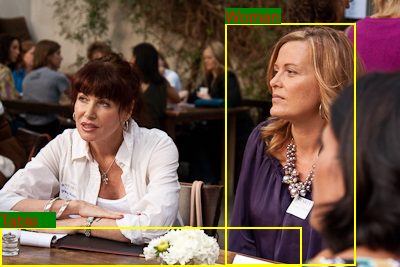

In [393]:
for i in range(1):
    img_path = os.path.join(images_path, images_list[i])
    img = Image.open(img_path)

    # Filter the DataFrame to get bounding boxes for the current image
    image_id = os.path.splitext(images_list[i])[0]
    # print(image_id)
    bbox_list = small_df[small_df['ImageID'] == image_id].to_dict(orient='records')
    print(bbox_list)
    # Draw bounding boxes on the image
    img_with_boxes = draw_bounding_boxes_on_image_with_labels(img, bbox_list,font_size=16)

    # Display the image with bounding boxes
    display(img_with_boxes)

In [405]:
bbox_list = df[df['ImageID'] == 'd99ed785c6771ae3'].to_dict(orient='records')


Relations = []
for i in range(100):
    imageRelationship = {}
    img_path = os.path.join(images_path, images_list[i])
    img = Image.open(img_path)

    # Filter the DataFrame to get bounding boxes for the current image
    image_id = os.path.splitext(images_list[i])[0]
    imageRelationship['image_id'] = image_id
    bbox_list = df[df['ImageID'] == image_id].to_dict(orient='records')
    # print(bbox_list)
    relations = []
    for i in range(len(bbox_list)):

        RelationshipLabel = bbox_list[i]['RelationshipLabel']
        if RelationshipLabel not in relations:
            relations.append(RelationshipLabel)
    imageRelationship['relations'] = relations
    Relations.append(imageRelationship)


In [411]:
from ast import literal_eval

In [413]:
relations_df = pd.DataFrame(Relations,columns=['image_id','relations'])
relations_df

,image_id,relations
0,d99ed785c6771ae3,"[at, is]"
1,ce5eb3fc9effaa64,"[is, at]"
2,4b0446c5d0d05cd4,"[on, at]"
3,7b7daa19b9e5fbe7,"[is, at]"
4,d916e071eda9c767,"[at, is]"
...,...,...
95,fc7b23ff45ae4085,"[at, is]"
96,bb9e13a1346778bd,[is]
97,811e47f4b58b5ef8,"[plays, is, holds]"
98,3c131bc23eef9c02,[is]


<ipython-input-390-61c1600d1cf4>:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label1, font=font)


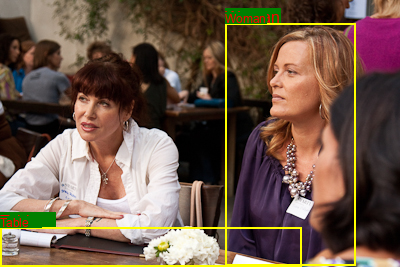

In [394]:
# img = Image.open(images_path +'/d99ed785c6771ae3.jpg')
# bbox_list = small_df[small_df['ImageID'] == 'd99ed785c6771ae3'].to_dict(orient='records')
# print(bbox_list)
# draw_bounding_boxes_on_image_with_labels(img, bbox_list)

[{'ImageID': 'd99ed785c6771ae3',
  'LabelName1': '/m/03bt1vf',
  'LabelName2': '/m/04bcr3',
  'XMin1': 0.5625,
  'XMax1': 0.8875,
  'YMin1': 0.086142324,
  'YMax1': 0.99250937,
  'XMin2': 0.0,
  'XMax2': 0.7525,
  'YMin2': 0.85393256,
  'YMax2': 0.9962547,
  'RelationshipLabel': 'at',
  'OriginalLandingURL': 'https://www.flickr.com/photos/sheltermovie/4817774882',
  'Label1': 'Woman',
  'Label2': 'Table'}]

## Relationship triplets

In [416]:
relationship_triplets_df = pd.read_csv(base_path + 'open_images_data/challenge-2018-relationship-triplets.csv')
relationship_triplets_df

,LabelName1,LabelName2,RelationshipLabel
0,/m/01599,/m/04bcr3,on
1,/m/05r655,/m/0h8my_4,holds
2,/m/05r655,/m/03k3r,on
3,/m/04yx4,/m/0l14j_,holds
4,/m/05r655,/m/080hkjn,wears
...,...,...,...
324,/m/03bt1vf,/m/0bt9lr,interacts_with
325,/m/05r655,/m/01226z,hits
326,/m/01bl7v,/m/01yrx,interacts_with
327,/m/07y_7,/m/083vt,is


In [418]:
relationship_triplets_df =    map_labelnames(relationship_triplets_df, classes_df)
relationship_triplets_df

,LabelName1,LabelName2,RelationshipLabel,Label1,Label2
0,/m/01599,/m/04bcr3,on,Beer,Table
1,/m/05r655,/m/0h8my_4,holds,Girl,Tennis racket
2,/m/05r655,/m/03k3r,on,Girl,Horse
3,/m/04yx4,/m/0l14j_,holds,Man,Flute
4,/m/05r655,/m/080hkjn,wears,Girl,Handbag
...,...,...,...,...,...
324,/m/03bt1vf,/m/0bt9lr,interacts_with,Woman,Dog
325,/m/05r655,/m/01226z,hits,Girl,Football
326,/m/01bl7v,/m/01yrx,interacts_with,Boy,Cat
327,/m/07y_7,/m/083vt,is,Violin,None


In [421]:
relationship_triplets_df['PredicateLabel'] = relationship_triplets_df['Label1'] +" "+ relationship_triplets_df['RelationshipLabel'] +"  "+ relationship_triplets_df['Label2']
relationship_triplets_df

,LabelName1,LabelName2,RelationshipLabel,Label1,Label2,PredicateLabel
0,/m/01599,/m/04bcr3,on,Beer,Table,Beer on Table
1,/m/05r655,/m/0h8my_4,holds,Girl,Tennis racket,Girl holds Tennis racket
2,/m/05r655,/m/03k3r,on,Girl,Horse,Girl on Horse
3,/m/04yx4,/m/0l14j_,holds,Man,Flute,Man holds Flute
4,/m/05r655,/m/080hkjn,wears,Girl,Handbag,Girl wears Handbag
...,...,...,...,...,...,...
324,/m/03bt1vf,/m/0bt9lr,interacts_with,Woman,Dog,Woman interacts_with Dog
325,/m/05r655,/m/01226z,hits,Girl,Football,Girl hits Football
326,/m/01bl7v,/m/01yrx,interacts_with,Boy,Cat,Boy interacts_with Cat
327,/m/07y_7,/m/083vt,is,Violin,None,NaN


In [422]:
small_df


,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,OriginalLandingURL,Label1,Label2
0,d99ed785c6771ae3,/m/03bt1vf,/m/04bcr3,0.562500,0.887500,0.086142,0.992509,0.000000,0.752500,0.853933,0.996255,at,https://www.flickr.com/photos/sheltermovie/481...,Woman,Table
1,ce5eb3fc9effaa64,/m/01mzpv,/m/083vt,0.530000,0.789231,0.518478,0.998913,0.530000,0.789231,0.518478,0.998913,is,https://www.flickr.com/photos/jinkazamah/47239...,Chair,None
2,4b0446c5d0d05cd4,/m/09tvcd,/m/04bcr3,0.229375,0.303750,0.389423,0.681731,0.055625,0.910000,0.390385,0.972115,on,https://www.flickr.com/photos/hotelcasarosalia...,Wine glass,Table
3,8c056435a53b6c77,/m/01mzpv,/m/04bcr3,0.064375,0.188125,0.420000,0.618333,0.000000,0.201875,0.424167,0.451667,at,https://www.flickr.com/photos/treevillage/1513...,Chair,Table
4,7b7daa19b9e5fbe7,/m/01mzpv,/m/083vt,0.198125,0.315000,0.925473,0.998888,0.198125,0.315000,0.925473,0.998888,is,https://www.flickr.com/photos/63122283@N06/797...,Chair,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,eda97ba9733d67a1,/m/01mzpv,/m/04bcr3,0.673750,0.788750,0.350000,0.520000,0.678750,0.922500,0.381667,0.548333,at,https://www.flickr.com/photos/grantwickes/7315...,Chair,Table
996,00182e06281874be,/m/01mzpv,/m/04lbp,0.424375,0.481875,0.336100,0.573997,0.424375,0.481875,0.336100,0.573997,is,https://www.flickr.com/photos/hydropower/59153...,Chair,None
997,ccaba89378548c4c,/m/03bt1vf,/m/04bcr3,0.440625,0.877500,0.197936,0.999062,0.000000,0.643750,0.600375,0.994371,at,https://www.flickr.com/photos/vocus/14442735562/,Woman,Table
998,bde74541ea20808d,/m/0342h,/m/083vt,0.033866,0.999059,0.510000,0.759375,0.033866,0.999059,0.510000,0.759375,is,https://www.flickr.com/photos/mangakamaidenpho...,Guitar,None
